In [1]:
# from ucimlrepo import fetch_ucirepo 
  
# # fetch dataset 
# mushroom = fetch_ucirepo(id=73) 
  
# # data (as pandas dataframes) 
# X = mushroom.data.features 
# y = mushroom.data.targets 
  
# # metadata 
# print(mushroom.metadata) 

# # variable information 
# print(mushroom.variables) 


## Start from here

In [2]:
# !wget https://archive.ics.uci.edu/static/public/73/mushroom.zip
# !mkdir "../datasets/mushroom"
# !mkdir -p "../datasets/preprocessed_data/"
# !unzip mushroom.zip -d "../datasets/mushroom"

--2024-10-12 01:55:18--  https://archive.ics.uci.edu/static/public/73/mushroom.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: 'mushroom.zip'

     0K .......... .......... .......... .......... .......... 1.91M
    50K .......... .......... .......... .......... .......... 4.09M
   100K .......... .......... .......... ........              4.06M=0.05s

2024-10-12 01:55:18 (2.89 MB/s) - 'mushroom.zip' saved [141318]

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file ../datasets/preprocessed_data/ already exists.
Error occurred while processing: ../datasets/preprocessed_data/.


Archive:  mushroom.zip
  inflating: ../datasets/mushroom/Index  
  inflating: ../datasets/mushroom/README  
  inflating: ../datasets/mushroom/agaricus-lepiota.data  
  inflating: ../datasets/mushroom/agaricus-lepiota.names  
  inflating: ../datasets/mushroom/expanded.Z  


In [3]:
import numpy as np
import csv
from dataset_utils import index_sizes_from_event_dict,get_cumulative_index_sizes
from dataset_utils import read_categorical_only_from_CSV


N = 8124
D = 23
CSV_FILENAME = '../datasets/mushroom/agaricus-lepiota.data'
EXPORT_FILENAME = "../datasets/preprocessed_data/mushroom_"


In [4]:
readable_labels_dict = {
	0	: "poisonous",
    1	: "cap-shape",
	2	: "cap-surface",
	3	: "cap-color",
	4	: "bruises",
	5	: "odor",
	6	: "gill-attachment",
	7	: "gill-spacing",
	8	: "gill-size",
	9	: "gill-color",
	10	: "stalk-shape",
	11	: "stalk-root",
	12	: "stalk-surface-above-ring",
	13	: "stalk-surface-below-ring",
	14	: "stalk-color-above-ring",
	15	: "stalk-color-below-ring",
	16	: "veil-type",
	17	: "veil-color",
	18	: "ring-number",
	19	: "ring-type",
	20	: "spore-print-color",
	21	: "population",
	22	: "habitat",
}

event_dictionary = {
    0   : ['p', 'e'],
    1	: ['x', 'b', 's', 'f', 'k', 'c'],
    2	: ['s', 'y', 'f', 'g'],
    3	: ['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r'],
    4	: ['t', 'f'],
    5	: ['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm'],
    6	: ['f', 'a'],
    7	: ['c', 'w'],
    8	: ['n', 'b'],
    9	: ['k', 'n', 'g', 'p', 'w', 'h', 'u', 'e', 'b', 'r', 'y', 'o'],
    10	: ['e', 't'],
    11	: ['e', 'c', 'b', 'r', '?'],
    12	: ['s', 'f', 'k', 'y'],
    13	: ['s', 'f', 'y', 'k'],
    14	: ['w', 'g', 'p', 'n', 'b', 'e', 'o', 'c', 'y'],
    15	: ['w', 'p', 'g', 'b', 'n', 'e', 'y', 'o', 'c'],
    16	: ['p'],
    17	: ['w', 'n', 'o', 'y'],
    18	: ['o', 't', 'n'],
    19	: ['p', 'e', 'l', 'f', 'n'],
    20	: ['k', 'n', 'u', 'h', 'w', 'r', 'o', 'y', 'b'],
    21	: ['s', 'n', 'a', 'v', 'y', 'c'],
    22	: ['u', 'g', 'm', 'd', 'p', 'w', 'l'],
}

In [5]:
I_ks = index_sizes_from_event_dict(event_dictionary)
print('I_ks    \t',I_ks)
cum_I_ks = get_cumulative_index_sizes(I_ks)
print('cum_I_ks \t',cum_I_ks)

I_ks    	 (2, 6, 4, 10, 2, 9, 2, 2, 2, 12, 2, 5, 4, 4, 9, 9, 1, 4, 3, 5, 9, 6, 7)
cum_I_ks 	 [0, 2, 8, 12, 22, 24, 33, 35, 37, 39, 51, 53, 58, 62, 66, 75, 84, 85, 89, 92, 97, 106, 112, 119]


In [6]:
X_arr = read_categorical_only_from_CSV(CSV_FILENAME,I_ks,N,event_dictionary)

(2, 6, 4, 10, 2, 9, 2, 2, 2, 12, 2, 5, 4, 4, 9, 9, 1, 4, 3, 5, 9, 6, 7)
119
8124


In [7]:
# np.save("onehotified_mushroom.npy",X_arr)

In [8]:
from dataset_utils import save_onehotified_dataset_to_numpy

trn_X,tst_X = save_onehotified_dataset_to_numpy(EXPORT_FILENAME,X_arr,N,D,I_ks,cum_I_ks,readable_labels_dict,event_dictionary)

## some quick visualization

In [9]:
trn_X_poison = trn_X[trn_X[:,0]==1]
trn_X_edible = trn_X[trn_X[:,1]==1]

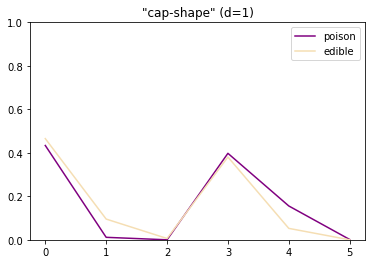

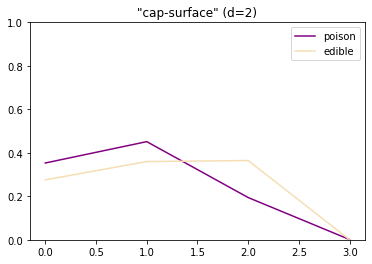

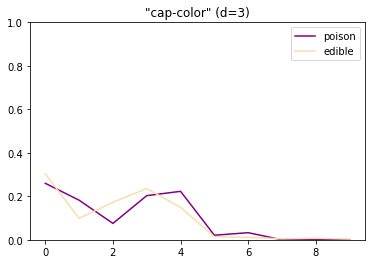

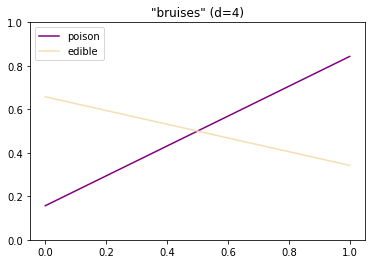

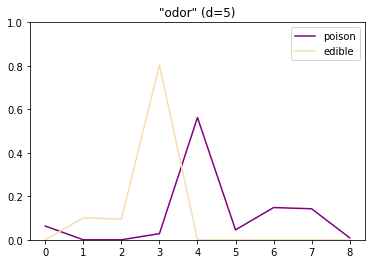

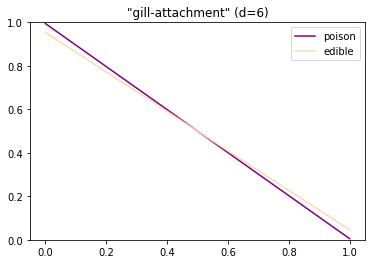

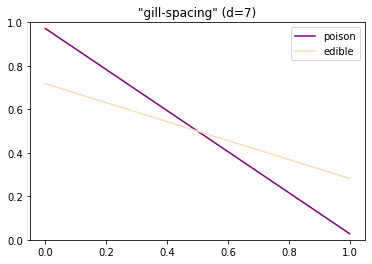

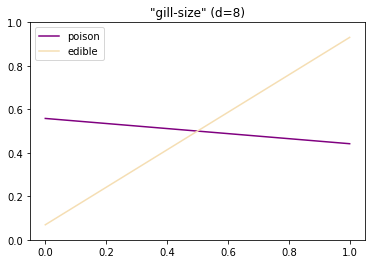

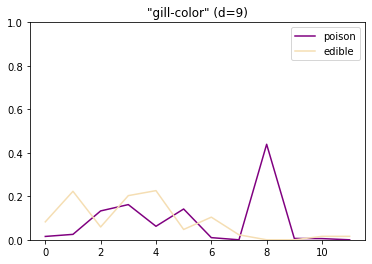

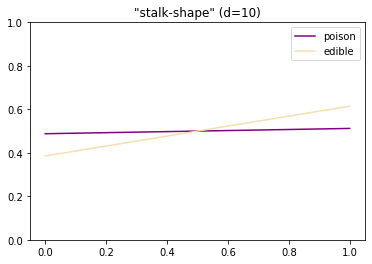

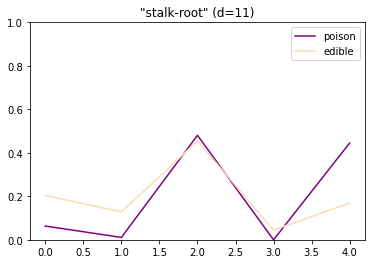

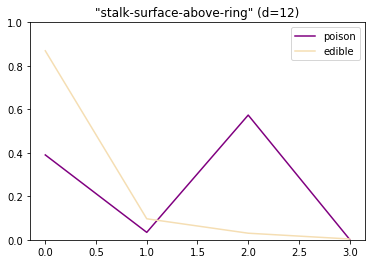

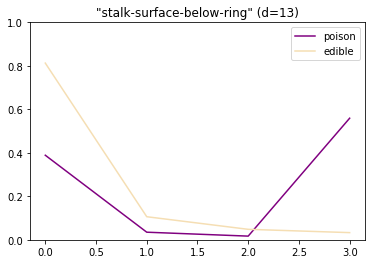

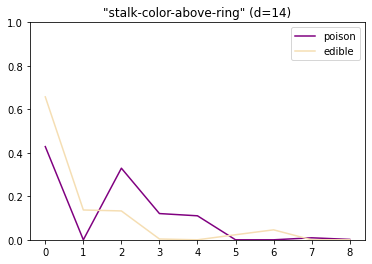

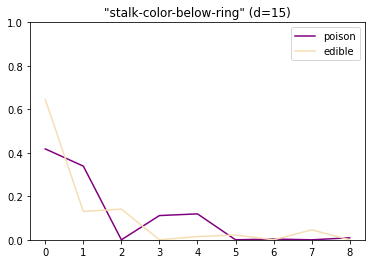

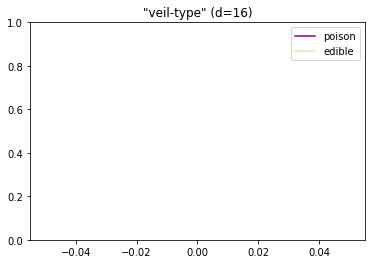

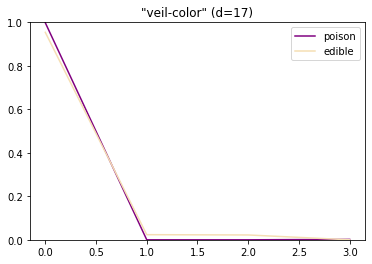

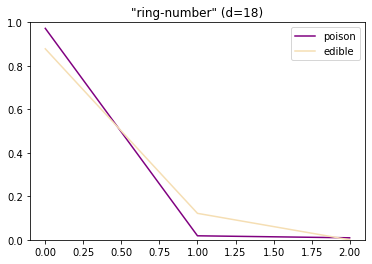

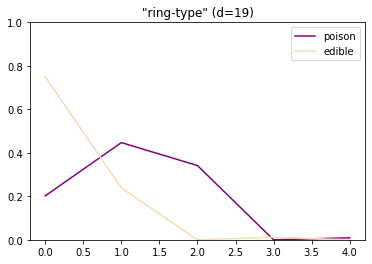

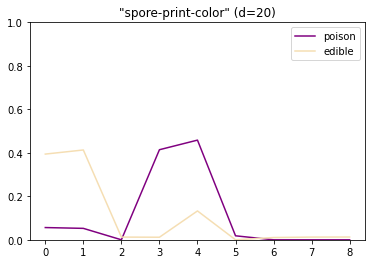

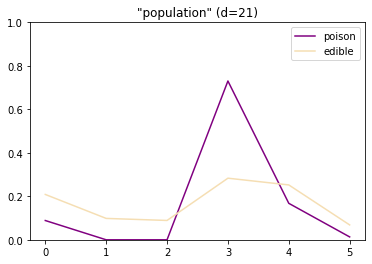

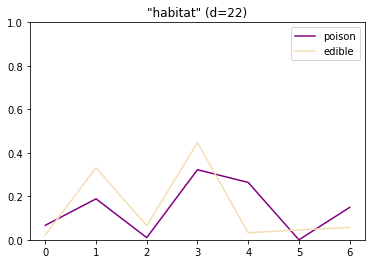

In [10]:
import matplotlib.pyplot as plt

for d in range(1,D):
    I_d = I_ks[d]
    cum_I_d = cum_I_ks[d]

    plt.title('\"'+readable_labels_dict[d]+"\" (d="+str(d)+")")
    plt.plot(np.arange(I_d),np.mean(trn_X_poison,axis=0)[cum_I_d:cum_I_d+I_d],c='purple')
    plt.plot(np.arange(I_d),np.mean(trn_X_edible,axis=0)[cum_I_d:cum_I_d+I_d],c='wheat')
    plt.ylim(0.0,1.0)
    plt.legend(['poison','edible'])
    plt.show()